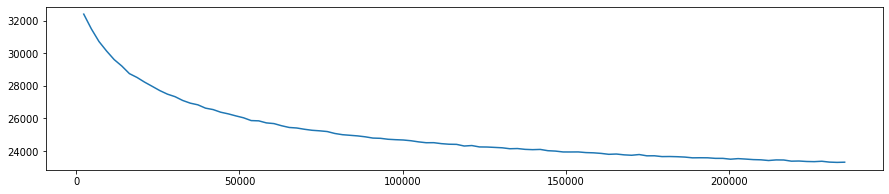

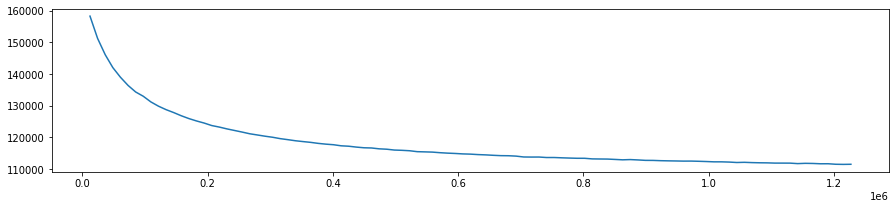

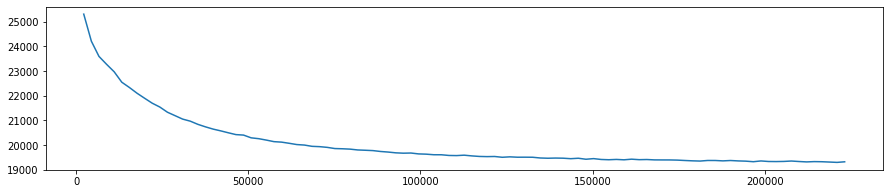

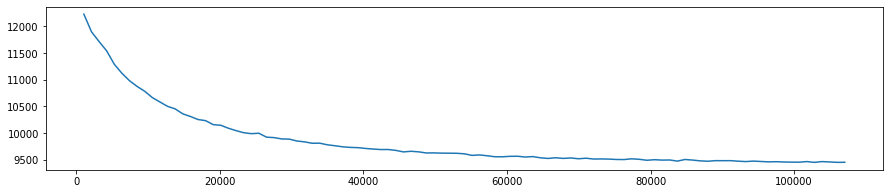

In [6]:
# Processing results from data collection from all datasets
# x axis = % of data collected
# y axis = % of performance achieved or MSE 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datasets = ['ml-20m-tiny', 'ml-20m-uniform', 'gl-tiny', 'gl']
mltiny_expmt = "5_False_0.01_0.4_uniform_23300_2330_0_30_1_233000_0.5_0.5_0_0.8"
ml_expmt = "5_False_0.01_0.4_uniform_121500_30_1_1215000_12150_0_0.5_0.5_0_0.8"
gltiny_expmt = "5_False_0.01_0.4_uniform_10600_30_1_106000_1060_0_0.5_0.5_0_0.8"
gl_expmt = "5_False_0.01_0.4_uniform_22100_30_1_221000_2210_0_0.5_0.5_0_0.8"
expmt_pairs = [('ml-20m-tiny', mltiny_expmt), ('ml-20m-uniform', ml_expmt), 
               ('gl', gl_expmt), ('gl-tiny', gltiny_expmt)]
for i, (dname, expmt) in enumerate(expmt_pairs):
    results_path = '../results/forecasting/' + dname + '/Random/' + expmt + '/'
    all_ss = np.loadtxt(results_path + 'sample_sizes')
    all_mses = np.loadtxt(results_path + 'mses')
    all_test_mses = np.loadtxt(results_path + 'test_mses')
    plt.figure(figsize=(15, 3))
    plt.plot(all_ss[0], all_mses[0])
    

In [11]:
mltiny_expmt = "5_False_0.0001_0.4_uniform_200_50_0_30_1_2000_0.5_0.5_0_0.8"
gltiny_expmt = "5_False_0.0001_0.4_uniform_200_30_1_1000_25_0_0.5_0.5_0_0.8"
ml_early_expmt = "5_False_0.0001_0.4_uniform_600_30_1_12000_30_0_0.5_0.5_0_0.8"
ml_later_expmt = "5_False_0.01_0.4_uniform_121500_30_1_1215000_12150_0_0.5_0.5_0_0.8"


In [24]:
expmt = ml_expmt
dname = 'ml-20m-uniform'
early_results_path = '../results/forecasting/' + dname + '/Random/' + ml_early_expmt + '/'
early_ss = np.loadtxt(early_results_path + 'sample_sizes')
early_mses = np.loadtxt(early_results_path + 'mses')

later_results_path = '../results/forecasting/' + dname + '/Random/' + ml_later_expmt + '/'
later_ss = np.loadtxt(later_results_path + 'sample_sizes')
later_mses = np.loadtxt(later_results_path + 'mses')


In [33]:
n_runs = 5
ss_mse_results = []
all_ss = np.concatenate([early_ss[:,3:], later_ss[:]], axis=1)
all_mse =  np.concatenate([early_mses[:,3:], later_mses[:]], axis=1)
for i in range(n_runs):
    for ss, mse in zip(all_ss[i], all_mse[i]):
        ss_mse_results.append({'ss': ss, 'mse': mse, 'run': i})
ss_mse_df = pd.DataFrame(ss_mse_results)


([<matplotlib.axis.XTick at 0x7ff276d6c940>,
 [Text(0, 0, '10e2'),
  Text(0, 0, '10e3'),
  Text(0, 0, '10e4'),
  Text(0, 0, '10e6')])

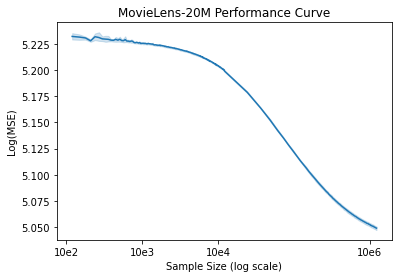

In [44]:
ss_mse_df['logss'] = np.log10(ss_mse_df['ss'])
ss_mse_df['logmse'] = np.log10(ss_mse_df['mse'])

sns.lineplot(x='logss', y='logmse', data=ss_mse_df)
plt.ylabel("Log(MSE)")
plt.title("MovieLens-20M Performance Curve")
plt.xlabel("Sample Size (log scale)")
plt.xticks([2.0, 3.0, 4.0, 6.0], labels=["10e2", "10e3", "10e4", "10e6"])


Text(0.5, 0, 'Sample Size')

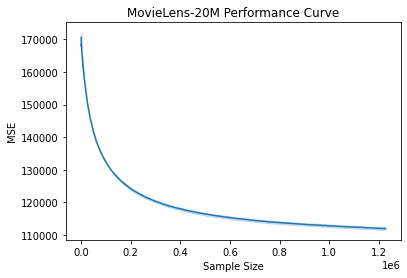

In [41]:
sns.lineplot(x='ss', y='mse', data=ss_mse_df)
plt.ylabel("MSE")
plt.title("MovieLens-20M Performance Curve")
plt.xlabel("Sample Size")


In [20]:
early_ss

array([[   30.,    60.,    90., ..., 12090., 12120., 12150.],
       [   30.,    60.,    90., ..., 12090., 12120., 12150.],
       [   30.,    60.,    90., ..., 12090., 12120., 12150.],
       [   30.,    60.,    90., ..., 12090., 12120., 12150.],
       [   30.,    60.,    90., ..., 12090., 12120., 12150.]])